### Exploratory data analysis
- The process of organizing, plotting, and summarizing a data set
> "Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone."<br>
-John Tukey

### 2008 US swing state election results

In [1]:
import pandas as pd
df_swing = pd.read_csv('2008_swing_states.csv')
df_swing[['state', 'county', 'dem_share']].head()

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04


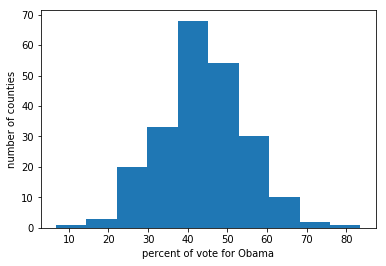

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

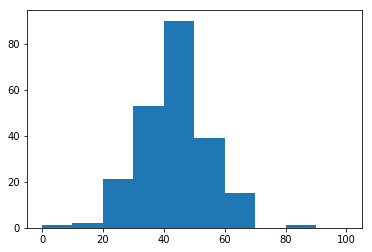

In [3]:
bin_edges = [0,10,20,30,40,50,60,70,80,90,100]
_ = plt.hist(df_swing['dem_share'], bins=bin_edges)

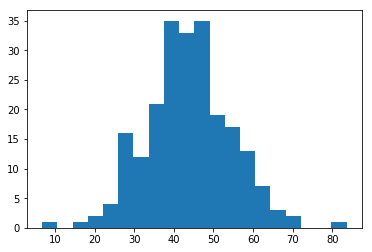

In [4]:
_ = plt.hist(df_swing['dem_share'], bins=20)

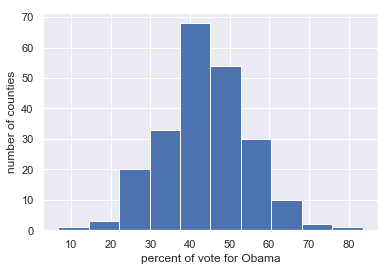

In [5]:
import seaborn as sns
sns.set()
_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

In [6]:
from sklearn.datasets import load_iris
data = load_iris()
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
versicolor = data.data[data.target == 1]

In [8]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
import numpy as np
versicolor_petal_length = versicolor[:,2]
versicolor_petal_length
n_data = len(versicolor_petal_length)
n_bins = int(np.sqrt(n_data))
n_bins

7

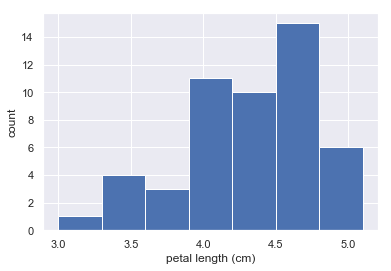

In [10]:
_ = plt.hist(versicolor_petal_length, bins=n_bins)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')
plt.show()

### Plot all of your data: Bee swarm plots

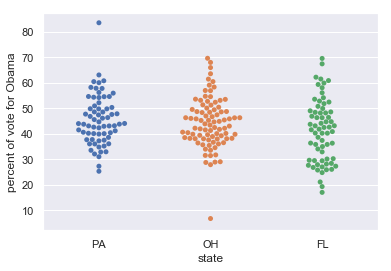

In [11]:
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

In [12]:
df = pd.read_csv('iris.csv', names=['sepal length(cm)','sepal width (cm)','petal length (cm)',
                                     'petal width (cm)','species'])
df.species = df.species.str.replace('Iris-', '')
df

,sepal length(cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


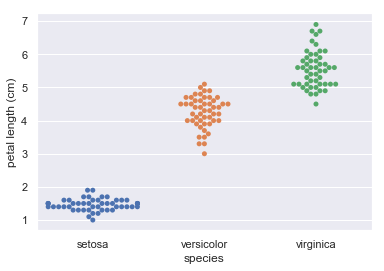

In [13]:
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
plt.show()

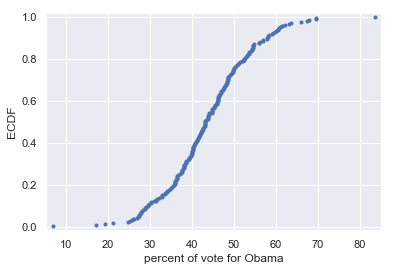

In [14]:
#Plotting all of our data: ECDFs
x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x)+1)/len(x)
_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [15]:
def ecdf(data):
    '''Compute ECDF for a one-dimensional array of measurements'''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

In [29]:
versicolor = df[df['species'] == 'versicolor']
versicolor_petal_length = np.array(versicolor['petal length (cm)'])
setosa = df[df['species'] == 'setosa']
setosa_petal_length = np.array(setosa['petal length (cm)'])
virginica = df[df['species'] == 'virginica']
virginica_petal_length = np.array(virginica['petal length (cm)'])
versicolor_petal_length, setosa_petal_length, virginica_petal_length

(array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
        4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
        4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
        4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1]),
 array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
        1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
        1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
        1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4]),
 array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
        5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
        4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
        5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1]))

In [30]:
x_vers, y_vers = ecdf(versicolor_petal_length)
x_set, y_set = ecdf(setosa_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

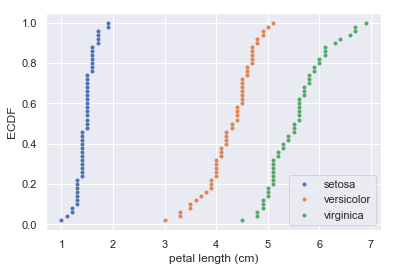

In [31]:
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')
plt.show()